In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import json
import pandas as pd

In [5]:
data = gpd.read_file("geojson_0.json")

In [22]:
# Get the index of the row with the largest value in the 'footprint' column
idx = data['footprint'].idxmax()

# Use the index to get the row
max_footprint_row = data.loc[idx]
idx

11887

In [103]:
data[data['UseType']=='Residential']

,OBJECTID,CODE,BLD_ID,YearBuilt1,HEIGHT,ELEV,footprint,UseType,UseDescription,Shape_Length_1,Shape_Area_1,geometry
36,37,Building,503291745320,1977,22.26,38.51,1622.0,Residential,Three Units (Any Combination),359.092502,4.425734e+03,"MULTIPOLYGON (((-118.19224 33.78813, -118.1922..."
39,40,Building,509892745808,1923,9.92,32.60,356.0,Residential,Five or more apartments,401.899783,8.903658e+03,"MULTIPOLYGON (((-118.17043 33.78950, -118.1703..."
42,43,Building,503428745279,1927,18.32,35.89,909.0,Residential,Five or more apartments,396.180197,7.405476e+03,"MULTIPOLYGON (((-118.19170 33.78794, -118.1917..."
45,46,Building,502311745717,1977,21.89,37.31,2446.0,Residential,Four Units (Any Combination),400.130086,7.503758e+03,"MULTIPOLYGON (((-118.19549 33.78922, -118.1952..."
51,52,Building,498043745228,1938,11.64,23.23,644.0,Residential,Single,331.425290,5.046112e+03,"MULTIPOLYGON (((-118.20936 33.78779, -118.2094..."
...,...,...,...,...,...,...,...,...,...,...,...,...
25640,25641,Building,461445721376,1973,8.98,196.69,119.0,Residential,Mobile Home Parks,6470.165886,2.153294e+06,"MULTIPOLYGON (((-118.32959 33.72203, -118.3295..."
25641,25642,Building,461246722265,1973,15.50,286.05,2349.0,Residential,Mobile Home Parks,6470.165886,2.153294e+06,"MULTIPOLYGON (((-118.33030 33.72436, -118.3303..."
25642,25643,Building,461534722533,1973,12.66,339.07,3941.0,Residential,Mobile Home Parks,6470.165886,2.153294e+06,"MULTIPOLYGON (((-118.32922 33.72521, -118.3292..."
25643,25644,Building,461667722638,1973,13.94,333.95,2445.0,Residential,Mobile Home Parks,6470.165886,2.153294e+06,"MULTIPOLYGON (((-118.32893 33.72540, -118.3289..."


In [30]:
largest = data.loc[[11887]]
largest

,OBJECTID,CODE,BLD_ID,YearBuilt1,HEIGHT,ELEV,footprint,UseType,UseDescription,Shape_Length_1,Shape_Area_1,geometry
11887,11888,Building,459336748872,NaN,31.34,146.91,245836.0,Government,Government Parcel,40665.199891,1.903125e+07,"MULTIPOLYGON (((-118.33737 33.79840, -118.3372..."


In [ ]:
img_data = data[['OBJECTID', 'geometry']]
img_data

,OBJECTID,geometry
0,1,"MULTIPOLYGON (((-118.21885 33.78390, -118.2190..."
1,2,"MULTIPOLYGON (((-118.21854 33.78929, -118.2182..."
2,3,"MULTIPOLYGON (((-118.21824 33.78879, -118.2182..."
3,4,"MULTIPOLYGON (((-118.21864 33.78758, -118.2183..."
4,5,"MULTIPOLYGON (((-118.21817 33.78762, -118.2177..."
...,...,...
25640,25641,"MULTIPOLYGON (((-118.32959 33.72203, -118.3295..."
25641,25642,"MULTIPOLYGON (((-118.33030 33.72436, -118.3303..."
25642,25643,"MULTIPOLYGON (((-118.32922 33.72521, -118.3292..."
25643,25644,"MULTIPOLYGON (((-118.32893 33.72540, -118.3289..."


In [120]:
def plot_geometry(gdf):
    utm_proj = "+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs"
    gdf_utm = gdf.to_crs(utm_proj)
    fig, ax = plt.subplots(figsize=(5,5))  # Adjust the figure size as needed
    gdf_utm.plot(ax=ax, aspect='equal', alpha=0.5, edgecolor='k')

    # Get the limits of x and y axes
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Calculate the center point of x and y
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    length_half = 250

    new_x_min = x_center - length_half
    new_x_max = x_center + length_half
    new_y_min = y_center - length_half
    new_y_max = y_center + length_half
    ax.set_xlim(new_x_min, new_x_max)
    ax.set_ylim(new_y_min, new_y_max)
    # Show the plot
    ax.set_axis_off()
    plt.tight_layout()
    
    # Get the object ID from the 'OBJ_ID' column
    obj_id = gdf['OBJECTID'].values[0]
    print(obj_id)
    plt.savefig(f'img/{obj_id}.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    

In [121]:
gdf

,OBJECTID,CODE,BLD_ID,YearBuilt1,HEIGHT,ELEV,footprint,UseType,UseDescription,Shape_Length_1,Shape_Area_1,geometry
11887,11888,Building,459336748872,NaN,31.34,146.91,245836.0,Government,Government Parcel,40665.199891,1.903125e+07,"MULTIPOLYGON (((-118.33737 33.79840, -118.3372..."


11888


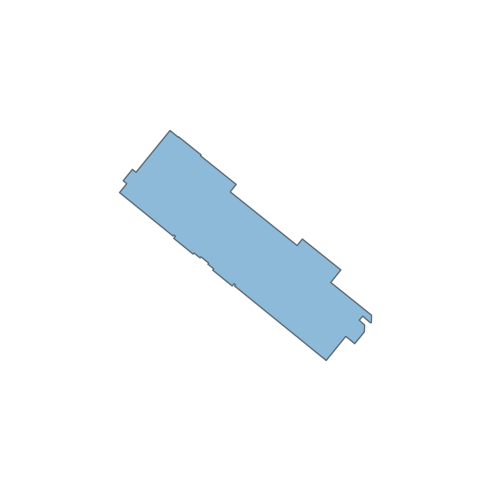

In [122]:
idx = 11888
gdf = data.loc[[idx-1]]
plot_geometry(gdf)

In [3]:
metadata = pd.read_csv('building_metadata_clean.csv')
height = pd.read_csv('building_metadata_height.csv')

In [4]:
metadata

,Unnamed: 0,OBJECTID,YearBuilt1,HEIGHT,UseDescription
0,0,37,1977.0,22.26,1
1,1,40,1923.0,9.92,4
2,2,43,1927.0,18.32,4
3,3,46,1977.0,21.89,5
4,4,52,1938.0,11.64,3
...,...,...,...,...,...
2619835,2801369,2618766,1976.0,17.27,6
2619836,2801370,2618767,1972.0,14.99,6
2619837,2801371,2618768,1962.0,23.27,3
2619838,2801372,2618769,1963.0,12.62,3


In [6]:
height = metadata[['HEIGHT']]
height

,HEIGHT
0,22.26
1,9.92
2,18.32
3,21.89
4,11.64
...,...
2619835,17.27
2619836,14.99
2619837,23.27
2619838,12.62


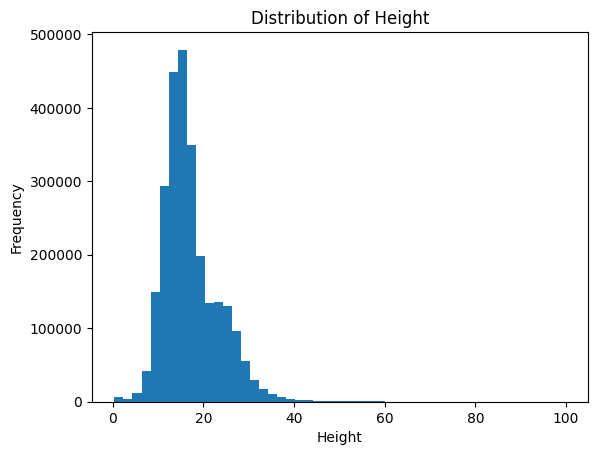

In [12]:
# Remove NaN values if any
height_clean = height.dropna()

# Plot the distribution
plt.hist(height, bins=50)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()